# ANN

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential

In [4]:
test = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetIA\ProjetIA\Raw_data\sign_mnist_test.csv')
train = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetIA\ProjetIA\Raw_data\sign_mnist_train.csv')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [5]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [7]:
X_train=train.drop(columns=["label"])
y_train=train["label"]
y_train=keras.utils.to_categorical(y_train,25)
X_test=test.drop(columns=["label"])
y_test=test["label"]
y_test=keras.utils.to_categorical(y_test)

In [9]:
X_train=np.array(X_train,dtype="float32")
X_test=np.array(X_test,dtype="float32")
X_test

array([[149., 149., 150., ..., 112., 120., 107.],
       [126., 128., 131., ..., 184., 182., 180.],
       [ 85.,  88.,  92., ..., 225., 224., 222.],
       ...,
       [190., 191., 190., ..., 211., 209., 208.],
       [201., 205., 208., ...,  67.,  70.,  63.],
       [173., 174., 173., ..., 195., 193., 192.]], dtype=float32)

In [10]:
X_train/=255
X_test/=255
X_test

array([[0.58431375, 0.58431375, 0.5882353 , ..., 0.4392157 , 0.47058824,
        0.41960785],
       [0.49411765, 0.5019608 , 0.5137255 , ..., 0.72156864, 0.7137255 ,
        0.7058824 ],
       [0.33333334, 0.34509805, 0.36078432, ..., 0.88235295, 0.8784314 ,
        0.87058824],
       ...,
       [0.74509805, 0.7490196 , 0.74509805, ..., 0.827451  , 0.81960785,
        0.8156863 ],
       [0.7882353 , 0.8039216 , 0.8156863 , ..., 0.2627451 , 0.27450982,
        0.24705882],
       [0.6784314 , 0.68235296, 0.6784314 , ..., 0.7647059 , 0.75686276,
        0.7529412 ]], dtype=float32)

In [13]:
print("X_train shape" +  str(X_train.shape))
print("X_test shape" +  str(X_test.shape))

X_train shape(27455, 784)
X_test shape(7172, 784)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


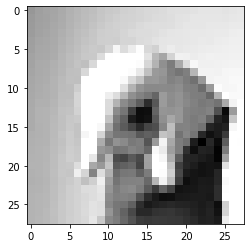

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[5].reshape(28,28) ,cmap="gray")
print(y_train[1])

In [19]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,),name="first_layer"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu",name="second_layer"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu",name="third_layer"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu",name="fourth_layer"))
model.add(Dropout(0.2))
model.add(Dense(25,activation="softmax",name="output_layer"))

In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
training=model.fit(X_train,y_train,epochs=50,batch_size=100,validation_split=0.2)

Epoch 1/50
220/220 [==============================] - 3s 9ms/step - loss: 2.9847 - accuracy: 0.0910 - val_loss: 2.2967 - val_accuracy: 0.2400
Epoch 2/50
220/220 [==============================] - 2s 8ms/step - loss: 2.1139 - accuracy: 0.2828 - val_loss: 1.5373 - val_accuracy: 0.4808
Epoch 3/50
220/220 [==============================] - 2s 8ms/step - loss: 1.6612 - accuracy: 0.4271 - val_loss: 1.2893 - val_accuracy: 0.5341
Epoch 4/50
220/220 [==============================] - 2s 8ms/step - loss: 1.4197 - accuracy: 0.5018 - val_loss: 1.0797 - val_accuracy: 0.6148
Epoch 5/50
220/220 [==============================] - 2s 8ms/step - loss: 1.2910 - accuracy: 0.5414 - val_loss: 0.9464 - val_accuracy: 0.6680
Epoch 6/50
220/220 [==============================] - 2s 8ms/step - loss: 1.1716 - accuracy: 0.5836 - val_loss: 0.8585 - val_accuracy: 0.7019
Epoch 7/50
220/220 [==============================] - 2s 8ms/step - loss: 1.0518 - accuracy: 0.6260 - val_loss: 0.6946 - val_accuracy: 0.7632
Epoch 

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 second_layer (Dense)        (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 third_layer (Dense)         (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 fourth_layer (Dense)        (None, 64)               

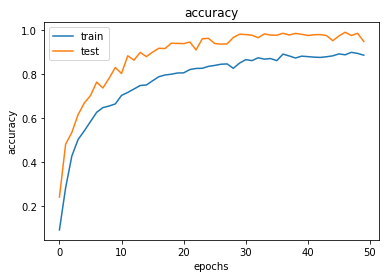

In [23]:
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"])

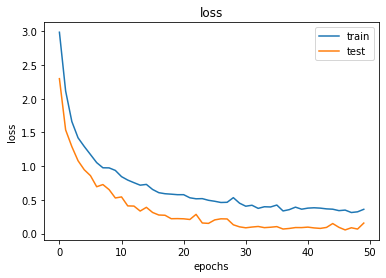

In [24]:
plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"])

In [25]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("test_loss",test_loss,"\n","test_accuracy",test_accuracy)

225/225 [==============================] - 0s 2ms/step - loss: 1.0585 - accuracy: 0.6868
test_loss 1.0585107803344727 
 test_accuracy 0.6868376731872559


# CNN

In [26]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [27]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [28]:
data_gen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
data_gen.fit(X_train)

In [29]:
model1=Sequential()
model1.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

model1.add(Conv2D(128,(3,3),input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

model1.add(Conv2D(256,(3,3),input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

In [30]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)      

In [31]:
model1.add(Flatten())
model1.add(Dense(128,activation="relu"))
model1.add(Dense(25,activation="softmax"))

In [32]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)      

In [33]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [34]:
training1=model1.fit(data_gen.flow(X_train,y_train,batch_size=100),epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
275/275 [==============================] - 43s 152ms/step - loss: 1.1323 - accuracy: 0.6449 - val_loss: 3.4481 - val_accuracy: 0.1984
Epoch 2/50
275/275 [==============================] - 48s 173ms/step - loss: 0.2641 - accuracy: 0.9147 - val_loss: 0.8624 - val_accuracy: 0.7499
Epoch 3/50
275/275 [==============================] - 45s 163ms/step - loss: 0.1334 - accuracy: 0.9589 - val_loss: 0.4510 - val_accuracy: 0.8596
Epoch 4/50
275/275 [==============================] - 44s 160ms/step - loss: 0.0905 - accuracy: 0.9719 - val_loss: 0.2686 - val_accuracy: 0.9116
Epoch 5/50
275/275 [==============================] - 43s 156ms/step - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.2818 - val_accuracy: 0.9030
Epoch 6/50
275/275 [==============================] - 43s 155ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.4994 - val_accuracy: 0.8562
Epoch 7/50
275/275 [==============================] - 43s 157ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.5158 - val_ac

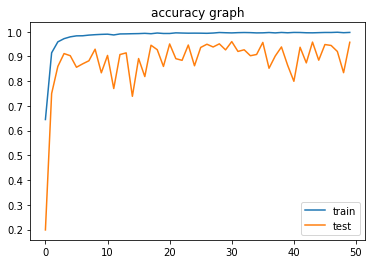

In [35]:
plt.plot(training1.history["accuracy"])
plt.plot(training1.history["val_accuracy"])
plt.title("accuracy graph")
plt.legend(["train","test"])

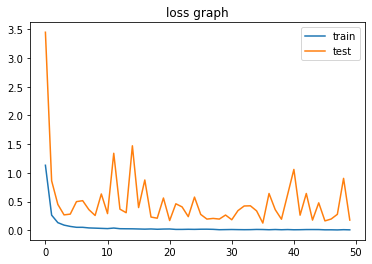

In [36]:
plt.plot(training1.history["loss"])
plt.plot(training1.history["val_loss"])
plt.title("loss graph")
plt.legend(["train","test"])

In [64]:
y_pred = model1.predict(X_test)

225/225 [==============================] - 2s 9ms/step


In [65]:
y_predic = np.argmax(y_pred, axis=1)
y_predic

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [69]:
y_predic.shape

(7172,)

In [75]:
y_test.shape

(7172, 25)

In [78]:
y_test2= np.argmax(y_test, axis=1)

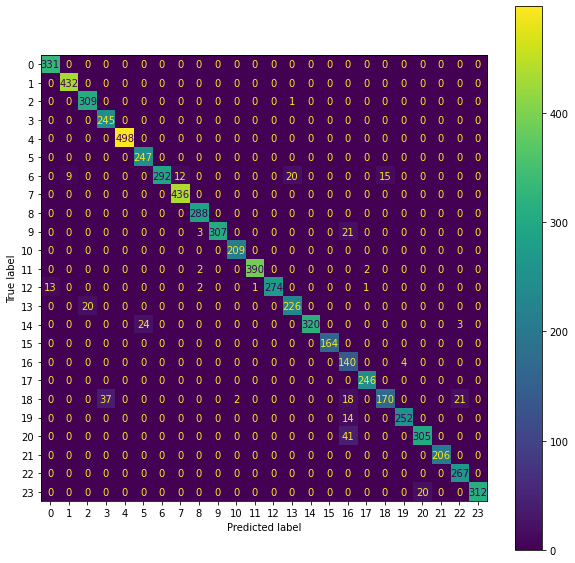

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test2,y_predic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predic))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       331
           1       0.98      1.00      0.99       432
           2       0.94      1.00      0.97       310
           3       0.87      1.00      0.93       245
           4       1.00      1.00      1.00       498
           5       0.91      1.00      0.95       247
           6       1.00      0.84      0.91       348
           7       0.97      1.00      0.99       436
           8       0.98      1.00      0.99       288
          10       1.00      0.93      0.96       331
          11       0.99      1.00      1.00       209
          12       1.00      0.99      0.99       394
          13       1.00      0.94      0.97       291
          14       0.91      0.92      0.92       246
          15       1.00      0.92      0.96       347
          16       1.00      1.00      1.00       164
          17       0.60      0.97      0.74       144
          18       0.99    